<a href="https://colab.research.google.com/github/LeeHakHyun/Tensorflow2.0_Practice/blob/master/Basic_Model/tensorflow2.0_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install tensorflow==2.0.0-beta0 


  Using cached https://files.pythonhosted.org/packages/6c/19/0d0c7f240db7bcd6b83783b9a89a67f38584d100e23ad5ae93114be92232/tensorflow-2.0.0b0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: tensorflow 2.0.0b1
    Uninstalling tensorflow-2.0.0b1:
      Successfully uninstalled tensorflow-2.0.0b1


In [0]:
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
  pass



In [30]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.0.0-beta1


In [31]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)

train_images = train_images/255.0
train_images = train_images.reshape((60000, 28, 28, 1))

print(train_images.shape)


(60000, 28, 28)
(60000, 28, 28, 1)


In [32]:
encoder_input  = keras.Input(shape = (28, 28, 1), name = 'img')
x              = layers.Conv2D(16, 3, strides = 2, padding='SAME', activation='relu')(encoder_input)
x              = layers.BatchNormalization()(x)
x              = layers.Conv2D(32, 3, strides = 2, padding='SAME', activation='relu')(x)
x              = layers.BatchNormalization()(x)
encoder_output = layers.Conv2D(64, 3, strides = 1, padding='SAME', activation='relu')(x)

encoder = keras.Model(encoder_input, encoder_output, name = 'encoder')
encoder.summary()



Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          18496     
Total params: 23,488
Trainable params: 23,392
Non-trainable params: 96
______________________________________________________

In [33]:
decoder_input  = keras.Input(shape = (7, 7, 64), name = 'encoding_img');
x              = layers.Conv2DTranspose(32, 3, strides = 2, padding='SAME', activation='relu')(decoder_input)
x              = layers.BatchNormalization()(x)
x              = layers.Conv2DTranspose(16, 3, strides = 2, padding='SAME', activation='relu')(x)
x              = layers.BatchNormalization()(x)
x              = layers.Conv2D(1, 3, strides = 1, padding='SAME', activation='relu')(x)
x              = layers.Conv2D(1, 3, strides = 1, padding='SAME', activation='relu')(x)
decoder_output = layers.Conv2D(1, 3, strides = 1, padding='SAME', activation='relu')(x)

decoder = keras.Model(decoder_input, decoder_output, name = 'decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoding_img (InputLayer)    [(None, 7, 7, 64)]        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 16)        4624      
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 1)         145       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 1)         10  

In [34]:
autoencoder_input = keras.Input(shape = (28, 28, 1), name = 'img')
encoding = encoder(autoencoder_input)
decoding = decoder(encoding);
autoencoder = keras.Model(autoencoder_input, decoding, name = 'autoencoder')

autoencoder.summary()


Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Model)              (None, 7, 7, 64)          23488     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         23445     
Total params: 46,933
Trainable params: 46,741
Non-trainable params: 192
_________________________________________________________________


In [35]:
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss = 'binary_crossentropy');
autoencoder.fit(train_images, train_images, batch_size = 64, epochs = 10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.7121
Epoch 2/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.3745
Epoch 3/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.3181
Epoch 4/10
60000/60000 [==============================] - 10s 158us/sample - loss: 0.3278
Epoch 5/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.3053
Epoch 6/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.3010
Epoch 7/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3063
Epoch 8/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.2950
Epoch 9/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.2937
Epoch 10/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.2928


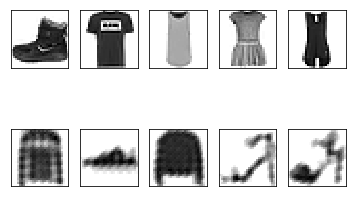

In [47]:
fig = plt.figure()
image = autoencoder.predict(train_images)
for i in range(10):
  # 2x5 그리드에 i+1번째 subplot을 추가하고 얻어옴
  subplot = fig.add_subplot(2, 5, i + 1)
  # x, y 축의 지점 표시를 안함
  subplot.set_xticks([])
  subplot.set_yticks([])
  if i < 5:
    subplot.imshow(train_images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
  else:
    subplot.imshow(image[i].reshape((28, 28)), cmap=plt.cm.gray_r)

plt.show()
